In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
(ip_train, op_train), (ip_test, op_test) = cifar10.load_data()
print(ip_train.shape, ip_test.shape)

170500096/170498071 [==============================] - 307s 2us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


In [3]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation="relu", input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

model.summary()

W1206 17:05:42.321925 140697827014464 deprecation.py:506] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [4]:
model.fit(ip_train, op_train, epochs = 2)

Epoch 1/2
50000/50000 [==============================] - 46s 913us/sample - loss: 1.7629 - acc: 0.4072
Epoch 2/2
50000/50000 [==============================] - 47s 935us/sample - loss: 1.3014 - acc: 0.5376


In [5]:
model.evaluate(ip_test, op_test, verbose = 2)

10000/10000 - 3s - loss: 1.2039 - acc: 0.5754


[1.2039343873977661, 0.5754]

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
test_image=ip_test[20]

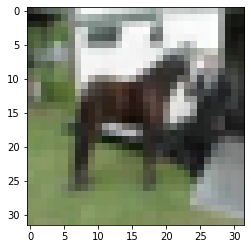

In [7]:
plt.imshow(test_image.reshape(32,32,3))

In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [9]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [10]:
test_image = image.img_to_array(test_image)

In [11]:
test_image = test_image.reshape(1,32,32,3)

In [12]:
result = model.predict(test_image)
result

array([[0.02141487, 0.00882174, 0.02276172, 0.0604402 , 0.06065995,
        0.19338037, 0.0081825 , 0.6016485 , 0.00093069, 0.02175955]],
      dtype=float32)

In [13]:
np.around(result)
n=(np.around(result)).argmax()
print(classes[n])

horse
